Objectives:

1. Determine the number of restaurants that provide table booking services and assess the impact of offering this service on their ratings (rate).

2. Identify the quantity of restaurants that offer online ordering and analyze its influence on their ratings (rate).

3. Investigate how the average cost for two (in INR) and the average customer review ranking (ave_review_ranking in the dataset) correlate with overall ratings (rate).

4. Examine the variation in ratings (rate) and average cost for two across different restaurant types.

5. Uncover additional insights related to restaurants, cities, and cuisines. This may include identifying top-performing and low-performing restaurants or determining which city boasts the highest number of restaurants.

# Data Exploration

In [2]:
import pandas as pd

# Load the FoodieBay dataset
data = pd.read_csv('FoodieBay.csv')

# Check the structure of the dataset (columns and data types)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40130 entries, 0 to 40129
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   url                 40130 non-null  object 
 1   address             40130 non-null  object 
 2   name                40130 non-null  object 
 3   phone               39246 non-null  object 
 4   location            40130 non-null  object 
 5   rest_type           40130 non-null  object 
 6   cuisines            40112 non-null  object 
 7   menu_item           40130 non-null  object 
 8   listed_in_type      40130 non-null  object 
 9   listed_in_city      40130 non-null  object 
 10  online_order        40130 non-null  object 
 11  book_table          40130 non-null  object 
 12  ave_cost_for_two    39890 non-null  float64
 13  dish_liked          17351 non-null  object 
 14  votes               40130 non-null  int64  
 15  ave_review_ranking  33751 non-null  float64
 16  rate

In [3]:
# Display the first few rows of the dataset to get a sense of the data
data.head()

,url,address,name,phone,location,rest_type,cuisines,menu_item,listed_in_type,listed_in_city,online_order,book_table,ave_cost_for_two,dish_liked,votes,ave_review_ranking,rate
0,https://www.zomato.com/bangalore/d2v-cafe-1-ba...,"173/218, GF, Opposite Ranka Colony, Bannerghat...",D2V Cafe,+91 9886986111\r\n+91 8550051111,Bannerghatta Road,Cafe,Cafe,[],Cafes,JP Nagar,No,No,700.0,NaN,13,4.75,3.6
1,https://www.zomato.com/bangalore/the-burger-pl...,"2nd Floor, MMR Plaza, Above DCB Bank, Sarjapur...",The Burger Place,+91 9108974600,Koramangala 1st Block,Quick Bites,"Burger, Continental, Fast Food",[],Dine-out,Koramangala 5th Block,Yes,No,400.0,NaN,28,4.50,3.8
2,https://www.zomato.com/bangalore/millet-mama-b...,"Next To Surana College, South End Circle, Basa...",Millet Mama,+91 7411918648\r\n+91 9986975625,Basavanagudi,Quick Bites,"South Indian, Healthy Food",[],Delivery,Jayanagar,Yes,No,200.0,NaN,18,4.00,3.9
3,https://www.zomato.com/bangalore/red-onion-sha...,"Money Chambers Double Road, Shanti Nagar, Bang...",Red Onion,+91 8867253669,Shanti Nagar,Casual Dining,"Chinese, North Indian, Biryani, Kebab","['Hyderabadi Biryani', 'Special Veg Combo', 'S...",Delivery,Brigade Road,Yes,Yes,1200.0,"Fish, Dumplings, Biryani, Paneer Tikka Masala,...",550,4.80,4.3
4,https://www.zomato.com/bangalore/chaiywaala-da...,"Shop 67, 69, 70, Inside Ramaiah Campus, New BE...",Chaiywaala Da Dhaba,+91 8217431260\n+91 7975991975,New BEL Road,Cafe,"Cafe, Tea",[],Dine-out,New BEL Road,Yes,No,250.0,"Ginger Chai, Pakoda, Tea, Paneer Thali, Chole ...",67,3.00,3.7


# Data Exploration

In [4]:
# Step 1: Handling Missing Values
# Fill missing numerical values with the mean
numerical_cols = ["ave_cost_for_two", "ave_review_ranking"]
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# Fill missing categorical values with a placeholder ("Not specified")
data["dish_liked"].fillna("Not specified", inplace=True)

# Step 2: Converting Categorical Variables to Numerical Format (One-Hot Encoding)
# Create dummy variables for categorical columns: "location", "listed_in_type", "listed_in_city"
data = pd.get_dummies(data, columns=["location", "listed_in_type", "listed_in_city"], drop_first=True)

# Step 3: Ensuring Correct Data Types
# Ensure "ave_cost_for_two" and "ave_review_ranking" are in the correct data types (float)
data["ave_cost_for_two"] = data["ave_cost_for_two"].astype(float)
data["ave_review_ranking"] = data["ave_review_ranking"].astype(float)

# Step 4: Cleaning and Preprocessing Other Features (not performed in this example)

# Display the preprocessed dataset
data.head()


,url,address,name,phone,rest_type,cuisines,menu_item,online_order,book_table,ave_cost_for_two,...,listed_in_city_Lavelle Road,listed_in_city_MG Road,listed_in_city_Malleshwaram,listed_in_city_Marathahalli,listed_in_city_New BEL Road,listed_in_city_Old Airport Road,listed_in_city_Rajajinagar,listed_in_city_Residency Road,listed_in_city_Sarjapur Road,listed_in_city_Whitefield
0,https://www.zomato.com/bangalore/d2v-cafe-1-ba...,"173/218, GF, Opposite Ranka Colony, Bannerghat...",D2V Cafe,+91 9886986111\r\n+91 8550051111,Cafe,Cafe,[],No,No,700.0,...,0,0,0,0,0,0,0,0,0,0
1,https://www.zomato.com/bangalore/the-burger-pl...,"2nd Floor, MMR Plaza, Above DCB Bank, Sarjapur...",The Burger Place,+91 9108974600,Quick Bites,"Burger, Continental, Fast Food",[],Yes,No,400.0,...,0,0,0,0,0,0,0,0,0,0
2,https://www.zomato.com/bangalore/millet-mama-b...,"Next To Surana College, South End Circle, Basa...",Millet Mama,+91 7411918648\r\n+91 9986975625,Quick Bites,"South Indian, Healthy Food",[],Yes,No,200.0,...,0,0,0,0,0,0,0,0,0,0
3,https://www.zomato.com/bangalore/red-onion-sha...,"Money Chambers Double Road, Shanti Nagar, Bang...",Red Onion,+91 8867253669,Casual Dining,"Chinese, North Indian, Biryani, Kebab","['Hyderabadi Biryani', 'Special Veg Combo', 'S...",Yes,Yes,1200.0,...,0,0,0,0,0,0,0,0,0,0
4,https://www.zomato.com/bangalore/chaiywaala-da...,"Shop 67, 69, 70, Inside Ramaiah Campus, New BE...",Chaiywaala Da Dhaba,+91 8217431260\n+91 7975991975,Cafe,"Cafe, Tea",[],Yes,No,250.0,...,0,0,0,0,1,0,0,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40130 entries, 0 to 40129
Columns: 141 entries, url to listed_in_city_Whitefield
dtypes: float64(3), int64(1), object(10), uint8(127)
memory usage: 9.1+ MB


# Data Analysis and Insights

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

#Calculate the number of restaurants that offer table booking.
table_booking_counts = data['book_table'].value_counts()
print("Number of Restaurants Offering Table Booking:")
print(table_booking_counts)

Number of Restaurants Offering Table Booking:
No     36036
Yes     4094
Name: book_table, dtype: int64


In [7]:
# Analyze the impact of table booking on ratings
table_booking_ratings = data.groupby('book_table')['rate'].mean()
print("\nImpact of Table Booking on Ratings:")
print(table_booking_ratings)


Impact of Table Booking on Ratings:
book_table
No     3.591944
Yes    4.111225
Name: rate, dtype: float64


In [8]:
#Calculate the number of restaurants that offer online ordering.
online_order_counts = data['online_order'].value_counts()
print("\nNumber of Restaurants Offering Online Ordering:")
print(online_order_counts)



Number of Restaurants Offering Online Ordering:
Yes    24559
No     15571
Name: online_order, dtype: int64


In [9]:
# Analyze the impact of online ordering on ratings
online_order_ratings = data.groupby('online_order')['rate'].mean()
print("\nImpact of Online Ordering on Ratings:")
print(online_order_ratings)


Impact of Online Ordering on Ratings:
online_order
No     3.579349
Yes    3.692300
Name: rate, dtype: float64


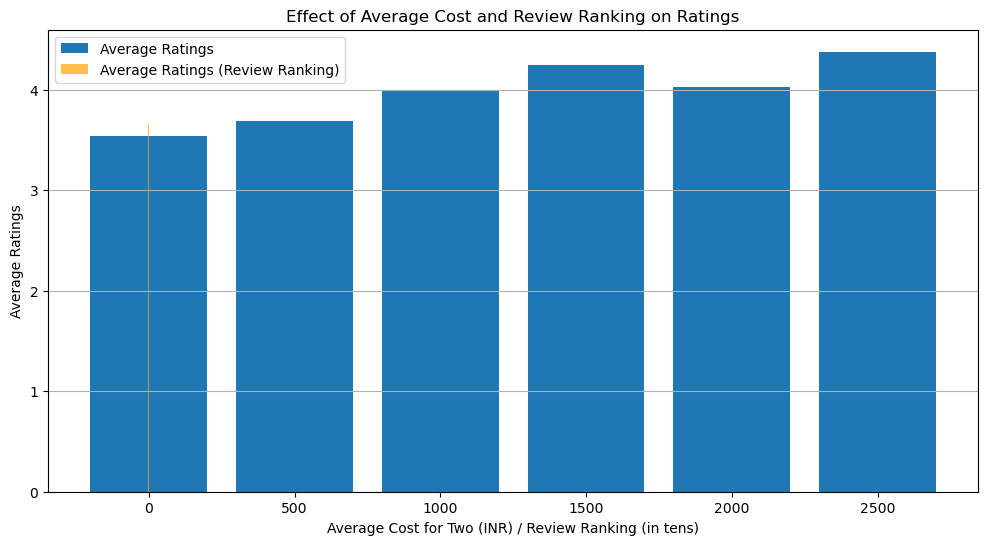

In [11]:
# Bar plot to visualize the effect of average cost for two and average customer review ranking on overall ratings
plt.figure(figsize=(12, 6))

# Plot average ratings for different cost ranges
cost_ranges = data['ave_cost_for_two'].astype(int) // 500 * 500  # Group cost in intervals of 500 INR
average_ratings = data.groupby(cost_ranges)['rate'].mean()
plt.bar(average_ratings.index, average_ratings.values, width=400, align='center', label='Average Ratings')

# Plot average ratings for different review rankings
review_rankings = data['ave_review_ranking'].astype(int) // 10 * 10  # Group rankings in intervals of 10
average_ratings = data.groupby(review_rankings)['rate'].mean()
plt.bar(average_ratings.index, average_ratings.values, width=5, alpha=0.7, color='orange', label='Average Ratings (Review Ranking)')

plt.xlabel('Average Cost for Two (INR) / Review Ranking (in tens)')
plt.ylabel('Average Ratings')
plt.title('Effect of Average Cost and Review Ranking on Ratings')
plt.legend()
plt.grid(axis='y')
plt.show()


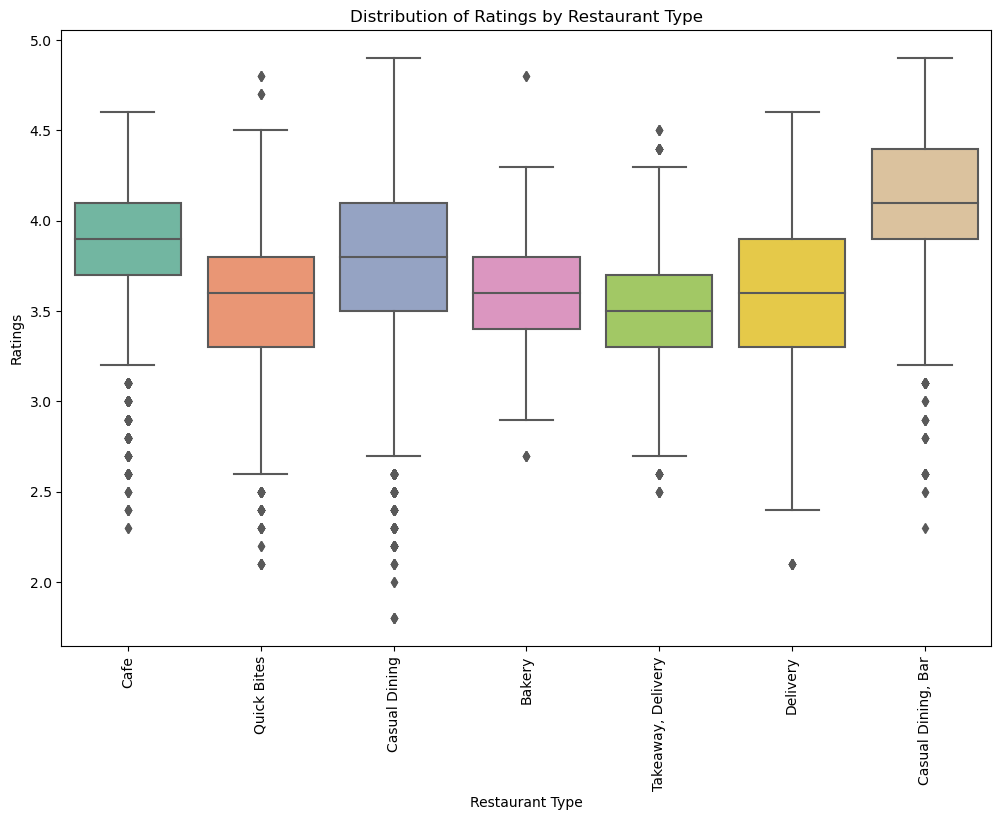

In [13]:
#Explore how ratings and average cost for two vary among restaurant types.
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a box plot to explore how ratings vary among restaurant types
sns.boxplot(data=data, x='rest_type', y='rate', palette='Set2')
plt.xlabel('Restaurant Type')
plt.ylabel('Ratings')
plt.title('Distribution of Ratings by Restaurant Type')
plt.xticks(rotation=90)

# Show the plot
plt.show()


Top 10 Best-Performing Restaurants:
                                 name  rate
20805  Asia Kitchen By Mainland China   4.9
32224  Asia Kitchen By Mainland China   4.9
5578                         Flechazo   4.9
4693   Asia Kitchen By Mainland China   4.9
13649                    Punjab Grill   4.9
10791       AB's - Absolute Barbecues   4.9
20297       AB's - Absolute Barbecues   4.9
30192                        Flechazo   4.9
25068  Asia Kitchen By Mainland China   4.9
33190       AB's - Absolute Barbecues   4.9

Top 10 Worst-Performing Restaurants:
                                   name  rate
36253  Alibi - Maya International Hotel   1.8
2342   Alibi - Maya International Hotel   1.8
15601  Alibi - Maya International Hotel   1.8
19663  Alibi - Maya International Hotel   1.8
5897   Alibi - Maya International Hotel   1.8
4890                            Bhagini   2.0
34136                           Bhagini   2.0
33342                     Mast Kalandar   2.1
18063                       

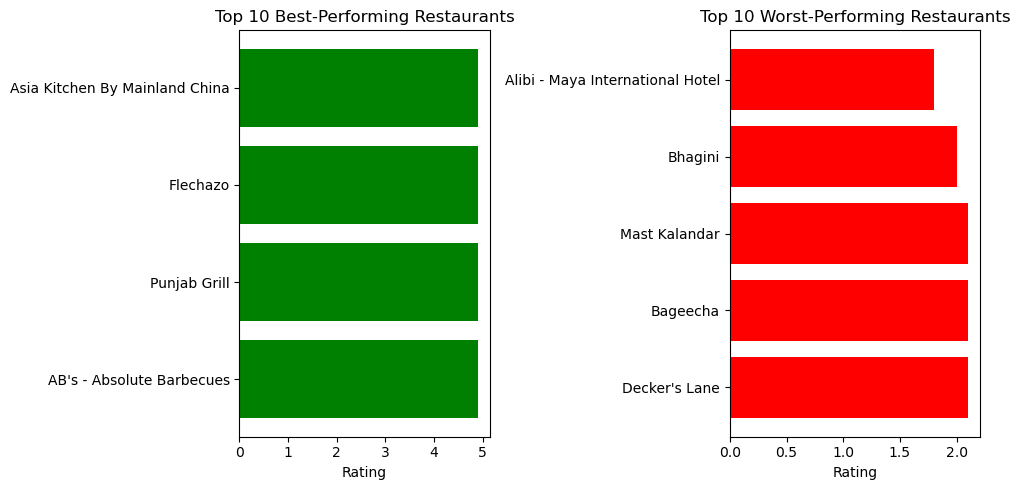

In [15]:
import matplotlib.pyplot as plt

# Sort the dataset by 'rate' column in descending order to find the best-performing restaurants
best_restaurants = data.sort_values(by='rate', ascending=False)

# Display the top 10 best-performing restaurants
print("Top 10 Best-Performing Restaurants:")
print(best_restaurants[['name', 'rate']].head(10))

# Display the bottom 10 worst-performing restaurants
worst_restaurants = data.sort_values(by='rate', ascending=True)
print("\nTop 10 Worst-Performing Restaurants:")
print(worst_restaurants[['name', 'rate']].head(10))

# Create bar charts to visualize the top and bottom rated restaurants
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.barh(best_restaurants['name'].head(10), best_restaurants['rate'].head(10), color='green')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest rating at the top
plt.xlabel('Rating')
plt.title('Top 10 Best-Performing Restaurants')

plt.subplot(1, 2, 2)
plt.barh(worst_restaurants['name'].head(10), worst_restaurants['rate'].head(10), color='red')
plt.gca().invert_yaxis()  # Invert the y-axis to show the lowest rating at the top
plt.xlabel('Rating')
plt.title('Top 10 Worst-Performing Restaurants')

plt.tight_layout()
plt.show()


Top 10 Most Popular Cuisines:
North Indian    18421
Chinese         13854
South Indian     8080
Fast Food        6472
Biryani          6278
Cafe             3875
Continental      3564
Beverages        2587
Italian          2405
Desserts         2172
dtype: int64


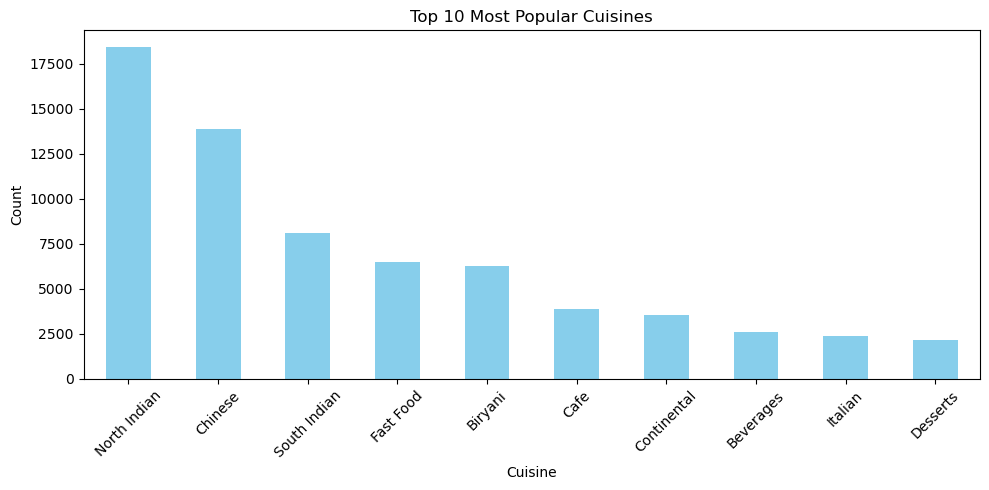

In [16]:
#Finding the Most Popular Cuisines
import matplotlib.pyplot as plt

# Split the 'cuisines' column to count the occurrence of each cuisine
cuisine_counts = data['cuisines'].str.split(', ', expand=True).stack().value_counts()

# Display the top 10 most popular cuisines
print("Top 10 Most Popular Cuisines:")
print(cuisine_counts.head(10))

# Create a bar chart to visualize the top 10 most popular cuisines
plt.figure(figsize=(10, 5))
cuisine_counts.head(10).plot(kind='bar', color='skyblue')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.title('Top 10 Most Popular Cuisines')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Visualization

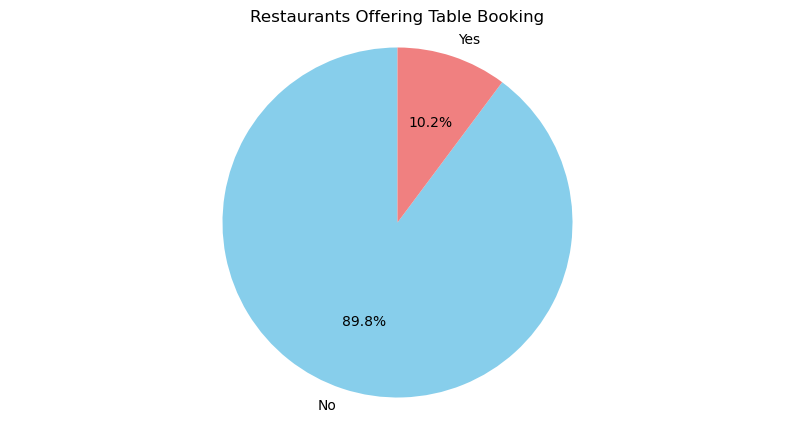

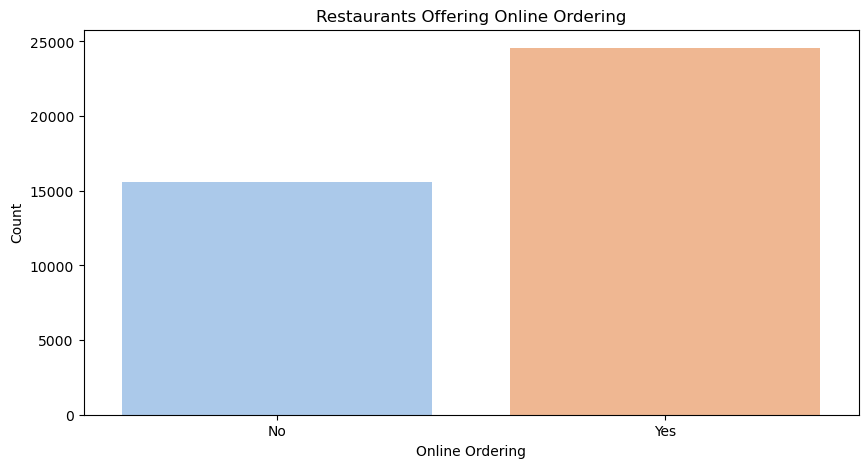

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pie chart for table booking
plt.figure(figsize=(10, 5))
table_booking_counts = data['book_table'].value_counts()
labels = table_booking_counts.index
sizes = table_booking_counts.values
colors = ['skyblue', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Restaurants Offering Table Booking')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

# Bar plot for online ordering
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='online_order', palette='pastel')
plt.title('Restaurants Offering Online Ordering')
plt.xlabel('Online Ordering')
plt.ylabel('Count')
plt.show()


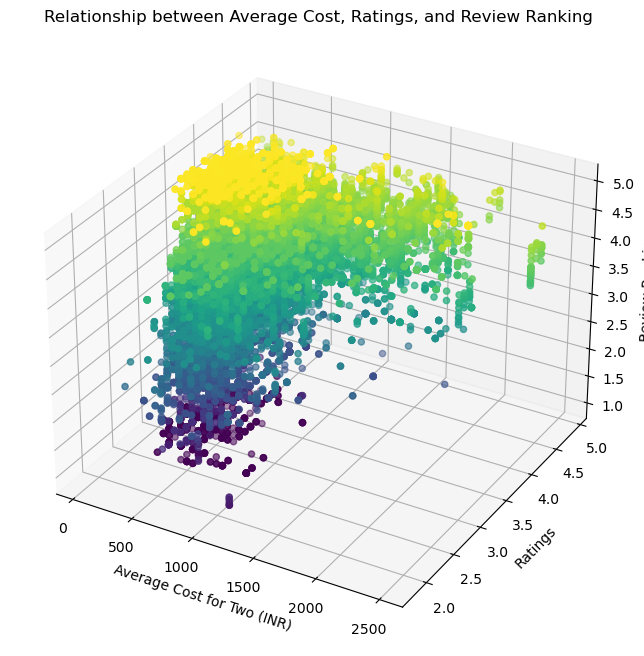

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot for Average Cost, Ratings, and Review Ranking
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

x = data['ave_cost_for_two']
y = data['rate']
z = data['ave_review_ranking']

ax.scatter(x, y, z, c=z, cmap='viridis', marker='o')

ax.set_xlabel('Average Cost for Two (INR)')
ax.set_ylabel('Ratings')
ax.set_zlabel('Review Ranking')
ax.set_title('Relationship between Average Cost, Ratings, and Review Ranking')

plt.show()


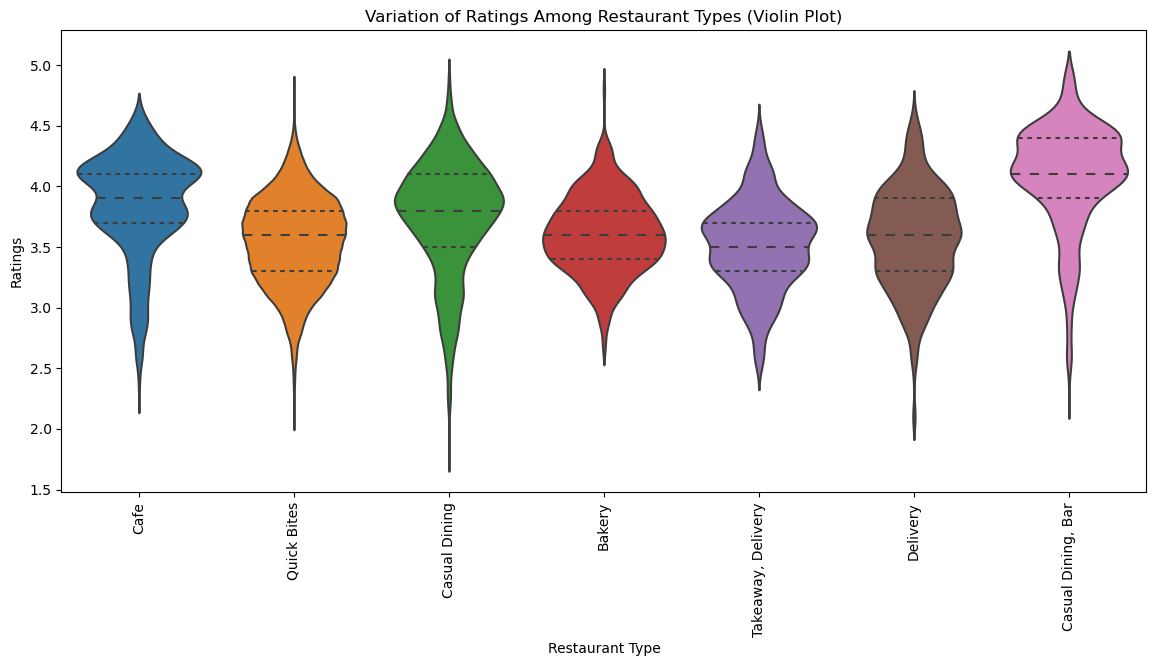

In [19]:
# Visualize the variation of Ratings among different restaurant types using a violin plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.violinplot(data=data, x='rest_type', y='rate', inner='quart')
plt.xticks(rotation=90)
plt.xlabel('Restaurant Type')
plt.ylabel('Ratings')
plt.title('Variation of Ratings Among Restaurant Types (Violin Plot)')
plt.show()


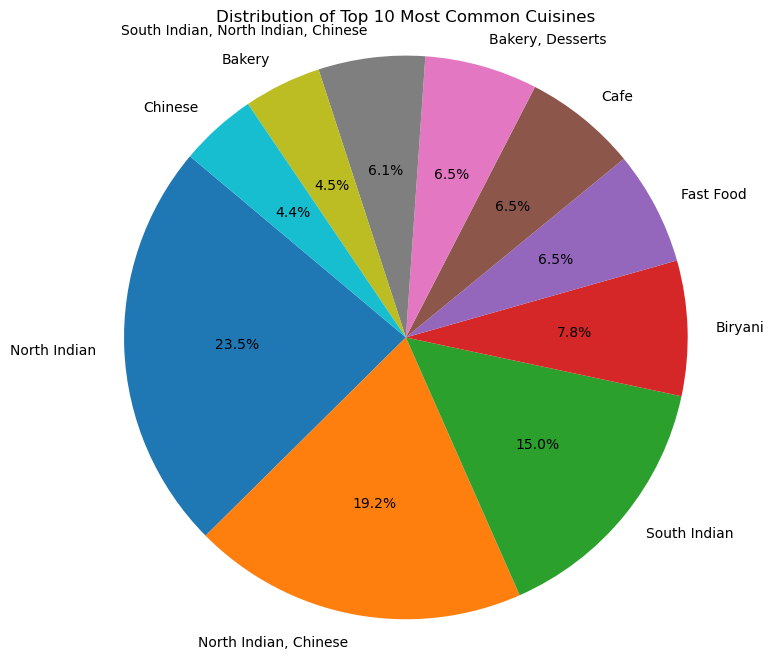

In [25]:
# Calculate the top 10 most common cuisines and their counts
top_cuisines = data['cuisines'].value_counts().head(10)

# Create a pie chart to visualize the distribution of the top cuisines
plt.figure(figsize=(8, 8))
plt.pie(top_cuisines, labels=top_cuisines.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.title('Distribution of Top 10 Most Common Cuisines')
plt.show()



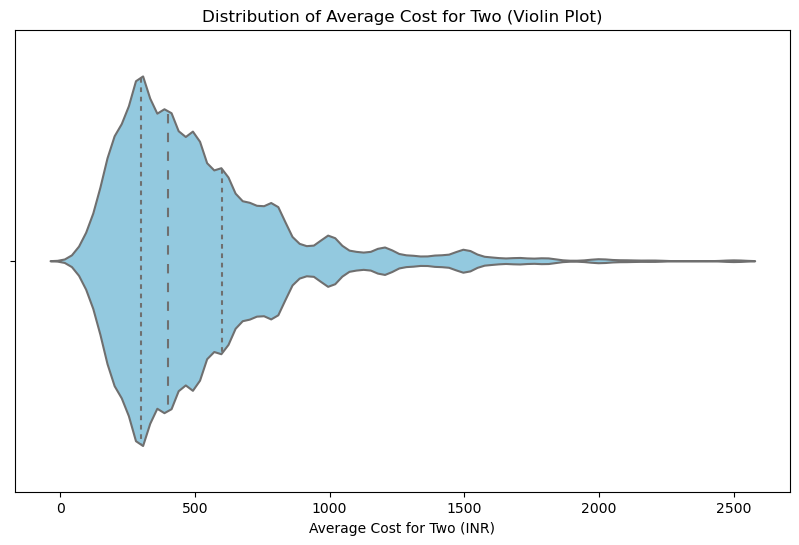

In [27]:
# Create a violin plot to visualize the distribution of average cost for two
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='ave_cost_for_two', color='skyblue', inner='quart')
plt.xlabel('Average Cost for Two (INR)')
plt.title('Distribution of Average Cost for Two (Violin Plot)')
plt.show()



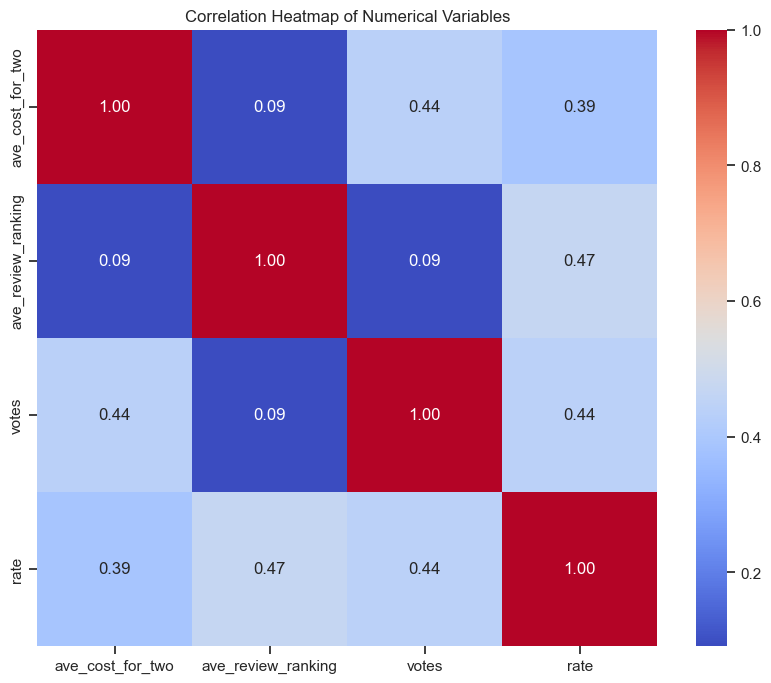

In [29]:
# Select the numerical variables of interest
numerical_variables = data[['ave_cost_for_two', 'ave_review_ranking', 'votes', 'rate']]

# Calculate the correlation matrix
correlation_matrix = numerical_variables.corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


# Machine Learning

In [31]:
import pandas as pd

# Load your dataset into a DataFrame
df = pd.read_csv('FoodieBay.csv')

# Handle Missing Values
# Check for missing values in each column
missing_values = df.isnull().sum()

# Remove rows with missing values
df.dropna(inplace=True)

#Removing duplicate entries
df.drop_duplicates(inplace=True)


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16870 entries, 3 to 40129
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   url                 16870 non-null  object 
 1   address             16870 non-null  object 
 2   name                16870 non-null  object 
 3   phone               16870 non-null  object 
 4   location            16870 non-null  object 
 5   rest_type           16870 non-null  object 
 6   cuisines            16870 non-null  object 
 7   menu_item           16870 non-null  object 
 8   listed_in_type      16870 non-null  object 
 9   listed_in_city      16870 non-null  object 
 10  online_order        16870 non-null  object 
 11  book_table          16870 non-null  object 
 12  ave_cost_for_two    16870 non-null  float64
 13  dish_liked          16870 non-null  object 
 14  votes               16870 non-null  int64  
 15  ave_review_ranking  16870 non-null  float64
 16  rate

In [34]:
#Drops features which are not useful in model training
df = df.drop(['url','address','name','phone','location','cuisines','dish_liked','menu_item'], axis=1)

In [35]:
df.head()

,rest_type,listed_in_type,listed_in_city,online_order,book_table,ave_cost_for_two,votes,ave_review_ranking,rate
3,Casual Dining,Delivery,Brigade Road,Yes,Yes,1200.0,550,4.800000,4.3
4,Cafe,Dine-out,New BEL Road,Yes,No,250.0,67,3.000000,3.7
5,Cafe,Cafes,Kammanahalli,Yes,No,650.0,140,3.500000,3.8
7,Quick Bites,Dine-out,Brigade Road,Yes,No,250.0,204,3.497167,4.1
8,Quick Bites,Delivery,BTM,Yes,No,300.0,127,1.854651,2.9


In [37]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Selecting features and target variable
X = df.drop(columns=['rate'])  # Features (excluding 'rate' which is the target variable)
y = df['rate']  # Target variable

# Encode categorical variables using one-hot encoding
categorical_columns = ['rest_type','listed_in_type', 'listed_in_city', 'online_order', 'book_table']
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Split the data into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=42)

# Display the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (12652, 46)
X_test shape: (4218, 46)
y_train shape: (12652,)
y_test shape: (4218,)


# Supervised Machine Learning

In [38]:
#Train all possible regression models for selecting best two

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Create a list of regression models
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    DecisionTreeRegressor(),
    RandomForestRegressor(random_state=42),
    GradientBoostingRegressor(),
    SVR(),
    KNeighborsRegressor()
]

# Initialize lists to store model names and evaluation results
model_names = []
mse_scores = []
r2_scores = []

# Loop through each regression model
for model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Append model name and evaluation results to lists
    model_names.append(type(model).__name__)
    mse_scores.append(mse)
    r2_scores.append(r2)

# Print evaluation results for each model
for i in range(len(models)):
    print(f"{model_names[i]} Results:")
    print(f"Mean Squared Error: {mse_scores[i]:.2f}")
    print(f"R-squared (R2) Score: {r2_scores[i]:.2f}")
    print()


LinearRegression Results:
Mean Squared Error: 0.10
R-squared (R2) Score: 0.47

Ridge Results:
Mean Squared Error: 0.10
R-squared (R2) Score: 0.47

Lasso Results:
Mean Squared Error: 0.15
R-squared (R2) Score: 0.19

ElasticNet Results:
Mean Squared Error: 0.15
R-squared (R2) Score: 0.19

DecisionTreeRegressor Results:
Mean Squared Error: 0.05
R-squared (R2) Score: 0.73

RandomForestRegressor Results:
Mean Squared Error: 0.03
R-squared (R2) Score: 0.83

GradientBoostingRegressor Results:
Mean Squared Error: 0.08
R-squared (R2) Score: 0.58

SVR Results:
Mean Squared Error: 0.14
R-squared (R2) Score: 0.22

KNeighborsRegressor Results:
Mean Squared Error: 0.06
R-squared (R2) Score: 0.65



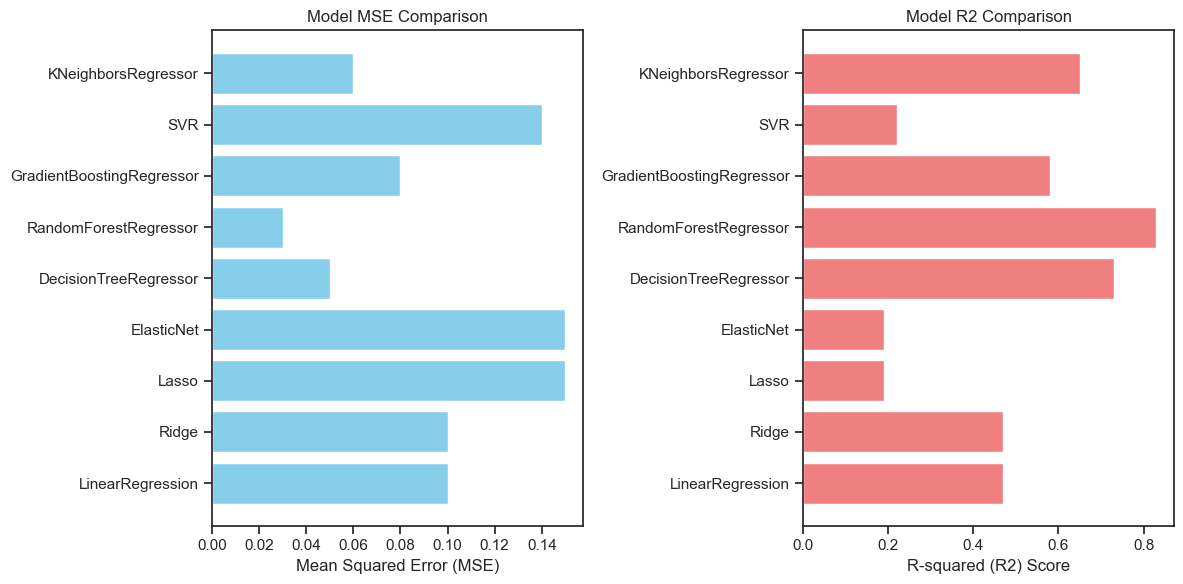

In [40]:
model_names = ['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet', 'DecisionTreeRegressor', 
               'RandomForestRegressor', 'GradientBoostingRegressor', 'SVR', 'KNeighborsRegressor']
mse_scores = [0.10, 0.10, 0.15, 0.15, 0.05, 0.03, 0.08, 0.14, 0.06]
r2_scores = [0.47, 0.47, 0.19, 0.19, 0.73, 0.83, 0.58, 0.22, 0.65]

# Create a bar plot for MSE and R2 scores
plt.figure(figsize=(12, 6))

# Bar plot for Mean Squared Error (MSE)
plt.subplot(1, 2, 1)
plt.barh(model_names, mse_scores, color='skyblue')
plt.xlabel('Mean Squared Error (MSE)')
plt.title('Model MSE Comparison')

# Bar plot for R-squared (R2) Score
plt.subplot(1, 2, 2)
plt.barh(model_names, r2_scores, color='lightcoral')
plt.xlabel('R-squared (R2) Score')
plt.title('Model R2 Comparison')

plt.tight_layout()
plt.show()


In [41]:
# Select two models
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the top-performing models
random_forest_model = RandomForestRegressor(random_state=42)
kneighbor_model = KNeighborsRegressor()

# Train the Random Forest Regressor
random_forest_model.fit(X_train, y_train)
rf_predictions = random_forest_model.predict(X_test)

# Train the K-Nearest Neighbors Regressor
kneighbor_model.fit(X_train, y_train)
kneighbor_predictions = kneighbor_model.predict(X_test)

# Evaluate the Random Forest Regressor
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Evaluate the K-Nearest Neighbors Regressor
kneighbor_mse = mean_squared_error(y_test, kneighbor_predictions)
kneighbor_r2 = r2_score(y_test, kneighbor_predictions)

# Print evaluation results for the two best models
print("Random Forest Regressor Results:")
print(f"Mean Squared Error: {rf_mse:.2f}")
print(f"R-squared (R2) Score: {rf_r2:.2f}")
print()

print("K-Nearest Neighbors Regressor Results:")
print(f"Mean Squared Error: {kneighbor_mse:.2f}")
print(f"R-squared (R2) Score: {kneighbor_r2:.2f}")


Random Forest Regressor Results:
Mean Squared Error: 0.03
R-squared (R2) Score: 0.83

K-Nearest Neighbors Regressor Results:
Mean Squared Error: 0.06
R-squared (R2) Score: 0.65


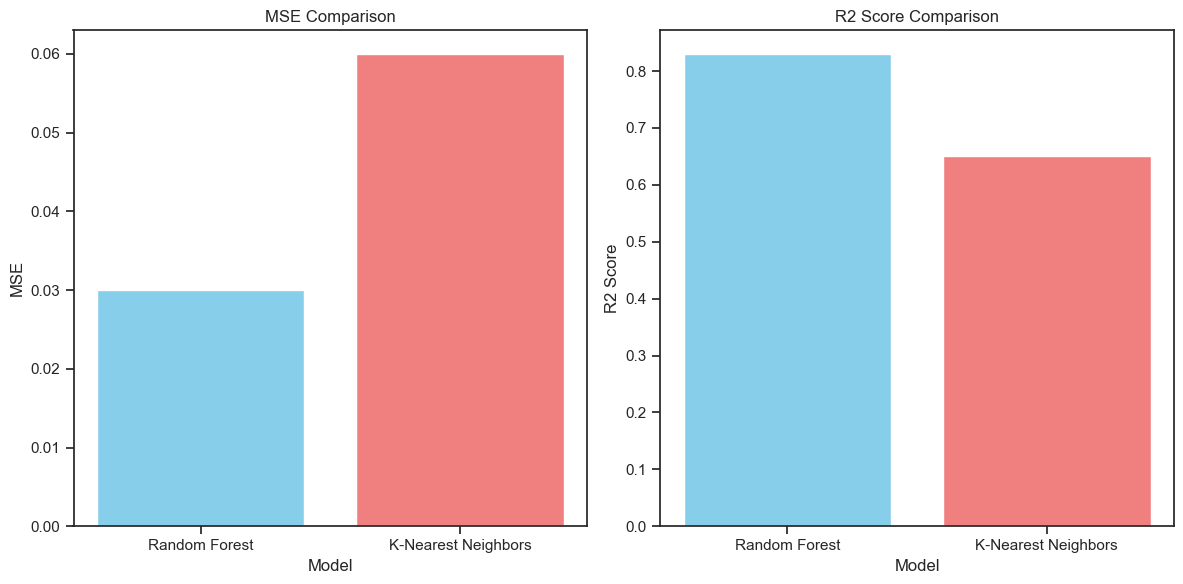

In [42]:
# Actual MSE and R2 scores
models = ['Random Forest', 'K-Nearest Neighbors']
mse_scores = [0.03, 0.06]
r2_scores = [0.83, 0.65]

# Create bar plots for MSE and R2 scores
plt.figure(figsize=(12, 6))

# Bar plot for Mean Squared Error (MSE)
plt.subplot(1, 2, 1)
plt.bar(models, mse_scores, color=['skyblue', 'lightcoral'])
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('MSE Comparison')

# Bar plot for R-squared (R2) Score
plt.subplot(1, 2, 2)
plt.bar(models, r2_scores, color=['skyblue', 'lightcoral'])
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('R2 Score Comparison')

plt.tight_layout()
plt.show()


# Insights into the strengths and weaknesses of each model

Based on the provided Mean Squared Error (MSE) and R-squared (R2) scores for the Random Forest Regressor and K-Nearest Neighbors (KNN) Regressor models, here are some insights into the strengths and weaknesses of each model:

**Random Forest Regressor:**
- **Strengths:**
  - Lower MSE (0.03): The Random Forest Regressor achieved a lower MSE, indicating better performance in terms of predicting the target variable with less error.
  - Higher R2 Score (0.83): The R2 score of 0.83 indicates that the model explains a significant portion of the variance in the target variable. It's a good fit for the data.
  - Robustness: Random Forest models are generally robust and less prone to overfitting due to ensemble techniques like bagging and feature randomization.

- **Weaknesses:**
  - Complexity: Random Forests can become computationally expensive and may not be suitable for real-time or resource-constrained applications.
  - Interpretability: Random Forest models are less interpretable compared to simpler models like linear regression.

**K-Nearest Neighbors (KNN) Regressor:**
- **Strengths:**
  - Simplicity: KNN is a simple and intuitive model that doesn't require complex training procedures.
  - Non-linearity: KNN can capture complex non-linear relationships in the data, which may be beneficial for certain datasets.

- **Weaknesses:**
  - Higher MSE (0.06): The KNN Regressor has a higher MSE, indicating that it predicts the target variable with more error compared to the Random Forest model.
  - Lower R2 Score (0.65): The R2 score of 0.65 suggests that the model explains less of the variance in the target variable compared to the Random Forest.
  - Sensitivity to Parameters: KNN performance heavily depends on the choice of the number of neighbors (K) and the distance metric, which can be a drawback if not selected optimally.
  - Computationally Intensive: KNN can be computationally intensive, especially when dealing with large datasets.

In summary, the Random Forest Regressor outperforms the K-Nearest Neighbors Regressor in this context, achieving lower MSE and a higher R2 score. The Random Forest model is a strong choice when predictive accuracy is a priority, while KNN may be more suitable when simplicity and non-linear relationships in the data are essential. However, the choice between models should also consider other factors like model interpretability, computational resources, and the specific problem requirements.

# Unsupervised Machine Learning

C:\Users\hy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:8

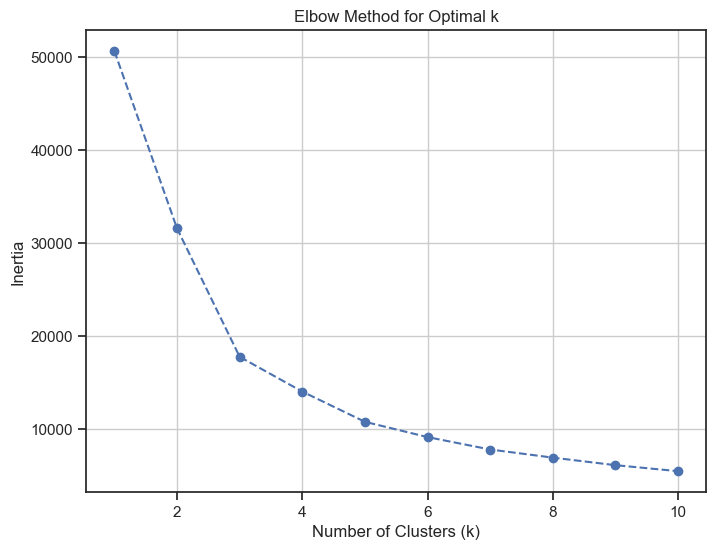

C:\Users\hy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics


# Select the features you want to use for clustering (e.g., numerical features)
selected_features = ['ave_cost_for_two', 'votes', 'ave_review_ranking','rate']

# Extract the selected features
X = df[selected_features]

# Standardize the features (important for K-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA for dimensionality reduction (optional, but can be useful)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Initialize a list to store the inertia (within-cluster sum of squares) values
inertia = []

# Try different values of k (number of clusters) and compute inertia for each
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)  # You can also use X_scaled instead of X_pca
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph to determine the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Based on the Elbow Method graph, determine the optimal number of clusters (k)
# In this case, let's assume k=3 as the optimal number of clusters

# Perform K-means clustering with the chosen k
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)  # You can also use X_scaled instead of X_pca

# Add the cluster labels to the DataFrame
df['cluster'] = cluster_labels

# Now, df contains the cluster labels for each data point


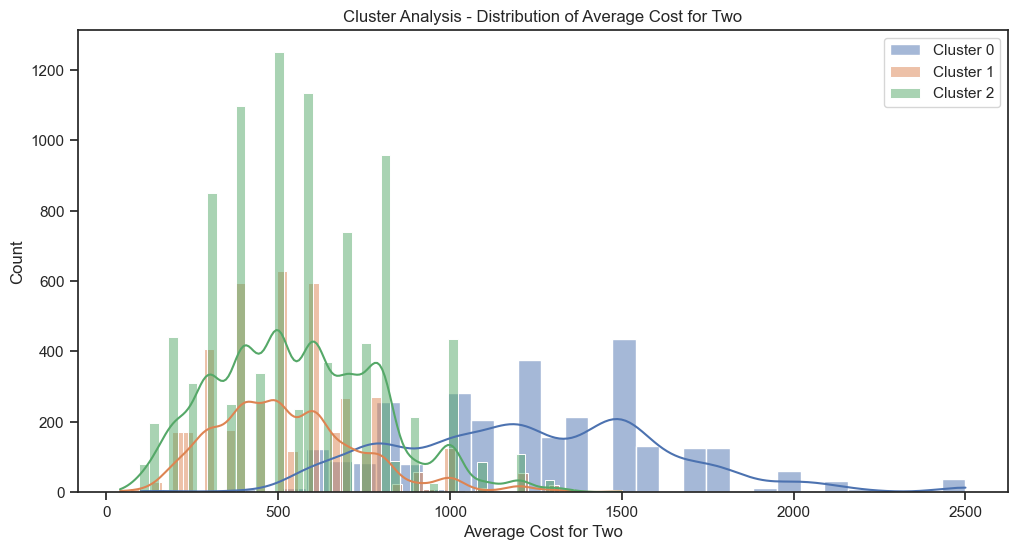

In [45]:
plt.figure(figsize=(12, 6))
for cluster_label in df['cluster'].unique():
    sns.histplot(df[df['cluster'] == cluster_label]['ave_cost_for_two'], kde=True, label=f'Cluster {cluster_label}', alpha=0.5)
plt.title('Cluster Analysis - Distribution of Average Cost for Two')
plt.xlabel('Average Cost for Two')
plt.legend()
plt.show()


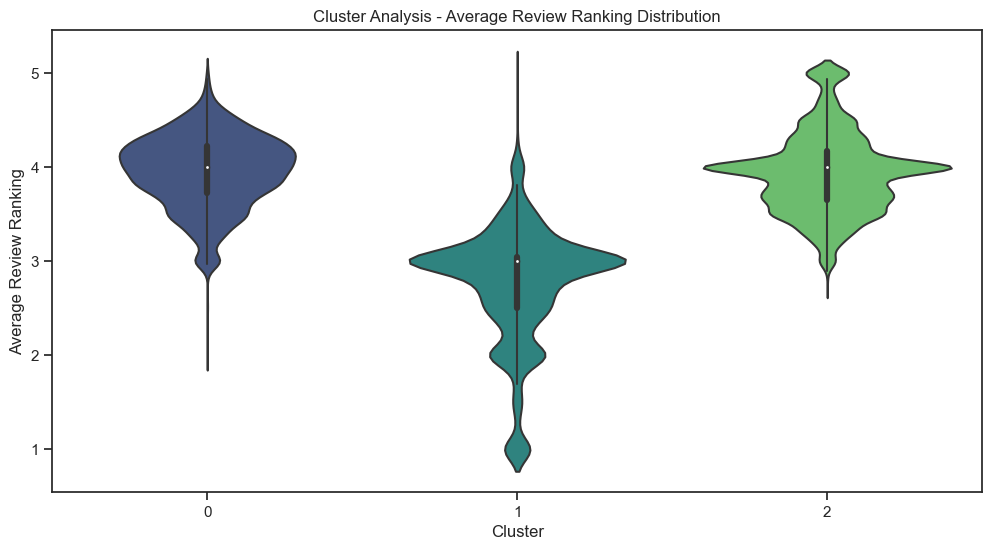

In [46]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='cluster', y='ave_review_ranking', palette='viridis')
plt.title('Cluster Analysis - Average Review Ranking Distribution')
plt.xlabel('Cluster')
plt.ylabel('Average Review Ranking')
plt.show()


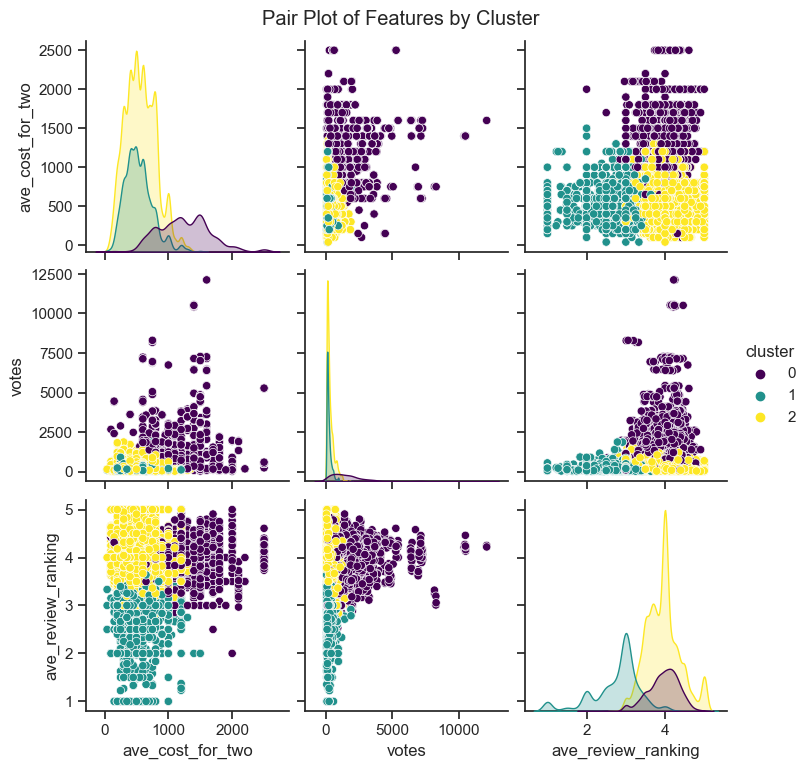

In [47]:
sns.pairplot(data=df, hue='cluster', vars=['ave_cost_for_two', 'votes', 'ave_review_ranking'], palette='viridis')
plt.suptitle('Pair Plot of Features by Cluster', y=1.02)
plt.show()
